# Text Analytics for Beginners using NLTK

Tutorial for improve skills: 'Text Analytics for Beginners using NLTK' (DATACAMP) by Marcus Mariano

**For more information about Marcus Mariano: [Web site](https://marcusmariano.github.io/mmariano/)**  

**Text Analytics for Beginners using NLTK [DATACAMP.](https://www.datacamp.com/community/tutorials/text-analytics-beginners-nltk)** 

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

from tqdm.notebook import tqdm

sns.set(style="darkgrid", color_codes=True)
%matplotlib inline

In this tutorial, you are going to cover the following topics:

- Text Analytics and NLP
- Compare Text Analytics, NLP and Text Mining
    - Text Analysis Operations using NLTK
    - Tokenization
    - Stopwords
    - Lexicon Normalization such as Stemming and Lemmatization
    - POS Tagging
- Sentiment Analysis
- Text Classification
- Performing Sentiment Analysis using Text Classification


## Text Analytics and NLP

Text communication is one of the most popular forms of day to day conversion. We chat, message, tweet, share status, email, write blogs, share opinion and feedback in our daily routine. All of these activities are generating text in a significant amount, which is unstructured in nature.

## Compare Text Analytics, NLP and Text Mining

Text mining also referred to as text analytics. Text mining is a process of exploring sizeable textual data and find patterns. Text Mining process the text itself, while NLP process with the underlying metadata. Finding frequency counts of words, length of the sentence, presence/absence of specific words is known as text mining. Natural language processing is one of the components of text mining. NLP helps identified sentiment, finding entities in the sentence, and category of blog/article. Text mining is preprocessed data for text analytics. In Text Analytics, statistical and machine learning algorithm used to classify information.

## Text Analysis Operations using NLTK

In [2]:
#Loading NLTK
import nltk
# nltk.download('punkt')

### Tokenization

Tokenization is the first step in text analytics. The process of breaking down a text paragraph into smaller chunks such as words or sentence is called Tokenization. Token is a single entity that is building blocks for sentence or paragraph.

In [3]:
from nltk.tokenize import sent_tokenize

In [4]:
text = """Hello Mr. Smith, how are you doing today? The weather is great, and city is awesome.
The sky is pinkish-blue. You shouldn't eat cardboard"""

tokenized_text = sent_tokenize(text)
print(tokenized_text)

['Hello Mr. Smith, how are you doing today?', 'The weather is great, and city is awesome.', 'The sky is pinkish-blue.', "You shouldn't eat cardboard"]


### Word Tokenization

Word tokenizer breaks text paragraph into words.

In [5]:
from nltk.tokenize import word_tokenize

In [6]:
tokenized_word = word_tokenize(text)

print(tokenized_word)

['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'city', 'is', 'awesome', '.', 'The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', "n't", 'eat', 'cardboard']


In [7]:
len(tokenized_word)

30

### Frequency Distribution

In [8]:
from nltk.probability import FreqDist

In [9]:
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 25 samples and 30 outcomes>


In [10]:
fdist.most_common(2)

[('is', 3), (',', 2)]

### Frequency Distribution Plot

In [11]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt

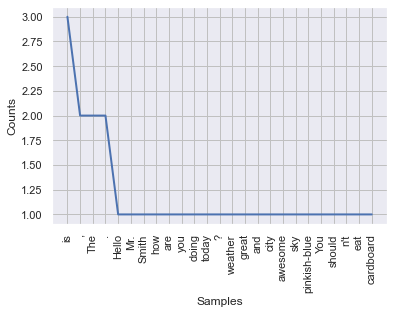

In [12]:
# Frequency Distribution Plot

fdist.plot(30,cumulative=False)
plt.show()

### Stopwords

Stopwords considered as noise in the text. Text may contain stop words such as is, am, are, this, a, an, the, etc.

In [13]:
from nltk.corpus import stopwords

In [14]:
stop_words=set(stopwords.words("english"))
print(stop_words)

{"you've", 'yours', "shan't", 'won', "wouldn't", 'between', 'hadn', 'yourselves', 'will', "doesn't", 'theirs', "didn't", 'while', 'if', 'aren', 'had', 'm', 'not', 'be', 'themselves', 'all', 'what', "won't", 'did', 'couldn', 'only', 'to', 'who', 'any', "needn't", 'wasn', 'for', 'and', 'ours', 'ourselves', 'few', "hadn't", 'of', 'over', "it's", 'them', 'up', 'd', 'some', 'my', 'there', 'your', 'her', 'own', 'shan', 'from', 'further', 'with', 'our', 'whom', 'weren', "you're", 's', "wasn't", 'yourself', 'or', 'mustn', 'hasn', 'but', 'these', 'shouldn', 'where', 'being', 'mightn', 'been', 'above', 'no', 'those', 'i', 'his', 'has', 't', 'when', 'wouldn', 'both', 'should', 'y', 'she', "mustn't", 'which', 'nor', 'the', 'through', "shouldn't", 'down', 'such', "you'd", 'does', 'how', 'is', 'than', 've', 'o', 'most', 'do', "don't", 'below', 'again', 'itself', 'were', 'at', 'more', 'have', "she's", 'am', 'by', 'haven', 'too', 'isn', 'hers', 'don', 'on', 'once', "weren't", 'under', 'this', 'as', 'j

In [15]:
filtered_sent=[]

for w in tokenized_word:
    if w not in stop_words:
        filtered_sent.append(w)

print("Tokenized Sentence:",tokenized_word)
print('\n')
print("Filterd Sentence:",filtered_sent)

Tokenized Sentence: ['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'city', 'is', 'awesome', '.', 'The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', "n't", 'eat', 'cardboard']


Filterd Sentence: ['Hello', 'Mr.', 'Smith', ',', 'today', '?', 'The', 'weather', 'great', ',', 'city', 'awesome', '.', 'The', 'sky', 'pinkish-blue', '.', 'You', "n't", 'eat', 'cardboard']


### Lexicon Normalization

Lexicon normalization considers another type of noise in the text. For example, connection, connected, connecting word reduce to a common word "connect". It reduces derivationally related forms of a word to a common root word.

#### Stemming

Stemming is a process of linguistic normalization, which reduces words to their word root word or chops off the derivational affixes. For example, connection, connected, connecting word reduce to a common word "connect".

In [16]:
# Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_sent)
print('\n')
print("Stemmed Sentence:",stemmed_words)

Filtered Sentence: ['Hello', 'Mr.', 'Smith', ',', 'today', '?', 'The', 'weather', 'great', ',', 'city', 'awesome', '.', 'The', 'sky', 'pinkish-blue', '.', 'You', "n't", 'eat', 'cardboard']


Stemmed Sentence: ['hello', 'mr.', 'smith', ',', 'today', '?', 'the', 'weather', 'great', ',', 'citi', 'awesom', '.', 'the', 'sky', 'pinkish-blu', '.', 'you', "n't", 'eat', 'cardboard']


#### Lemmatization

Lemmatization reduces words to their base word, which is linguistically correct lemmas. It transforms root word with the use of vocabulary and morphological analysis. Lemmatization is usually more sophisticated than stemming. Stemmer works on an individual word without knowledge of the context. For example, The word "better" has "good" as its lemma. This thing will miss by stemming because it requires a dictionary look-up.

In [22]:
# nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\marcus\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [17]:
#Lexicon Normalization
#performing stemming and Lemmatization

from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer
stem = PorterStemmer()

word = "flying"
print("Lemmatized Word:",lem.lemmatize(word,"v"))
print("Stemmed Word:",stem.stem(word))

Lemmatized Word: fly
Stemmed Word: fli


## POS Tagging

The primary target of Part-of-Speech(POS) tagging is to identify the grammatical group of a given word. Whether it is a NOUN, PRONOUN, ADJECTIVE, VERB, ADVERBS, etc. based on the context. POS Tagging looks for relationships within the sentence and assigns a corresponding tag to the word.

In [21]:
# nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\marcus\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [18]:
sent = "Albert Einstein was born in Ulm, Germany in 1879."

In [19]:
tokens = nltk.word_tokenize(sent)
print(tokens)

['Albert', 'Einstein', 'was', 'born', 'in', 'Ulm', ',', 'Germany', 'in', '1879', '.']


In [20]:
nltk.pos_tag(tokens)

[('Albert', 'NNP'),
 ('Einstein', 'NNP'),
 ('was', 'VBD'),
 ('born', 'VBN'),
 ('in', 'IN'),
 ('Ulm', 'NNP'),
 (',', ','),
 ('Germany', 'NNP'),
 ('in', 'IN'),
 ('1879', 'CD'),
 ('.', '.')]

#### Sentiment Analysis

Nowadays companies want to understand, what went wrong with their latest products? What users and the general public think about the latest feature? You can quantify such information with reasonable accuracy using sentiment analysis.

Quantifying users content, idea, belief, and opinion is known as sentiment analysis. User's online post, blogs, tweets, feedback of product helps business people to the target audience and innovate in products and services. Sentiment analysis helps in understanding people in a better and more accurate way. It is not only limited to marketing, but it can also be utilized in politics, research, and security.

There are mainly __two approaches__ for performing sentiment analysis.

    - Lexicon-based: count number of positive and negative words in given text and the larger count will be the sentiment of text.

    - Machine learning based approach: Develop a classification model, which is trained using the pre-labeled dataset of positive, negative, and neutral.

In this Tutorial, you will use the second approach(Machine learning based approach). This is how you learn sentiment and text classification with a single example.

#### Text Classification

Text classification is one of the important tasks of text mining. It is a supervised approach. Identifying category or class of given text such as a blog, book, web page, news articles, and tweets. It has various application in today's computer world such as spam detection, task categorization in CRM services, categorizing products on E-retailer websites, classifying the content of websites for a search engine, sentiments of customer feedback, etc. In the next section, you will learn how you can do text classification in python.

<img src="img/nlp.png" width="600">

## Performing Sentiment Analysis using Text Classification

This data has 5 sentiment labels:

- 0 - negative 1 - somewhat negative 2 - neutral 3 - somewhat positive 4 - positive

In [21]:
data = pd.read_csv('data/train.tsv', sep='\t')

In [22]:
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [24]:
data['Sentiment'].value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

Text(0, 0.5, 'Number of Review')

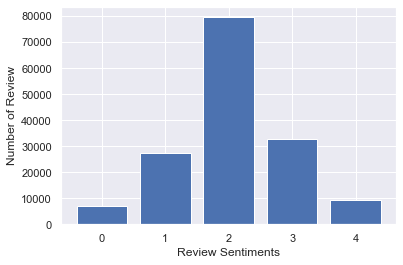

In [25]:
Sentiment_count=data.groupby('Sentiment').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['Phrase'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')


### Feature Generation using Bag of Words

In the Text Classification Problem, we have a set of texts and their respective labels. But we directly can't use text for our model. You need to convert these text into some numbers or vectors of numbers.

__Bag-of-words model(BoW)__ is the simplest way of extracting features from the text. BoW converts text into the matrix of occurrence of words within a document. This model concerns about whether given words occurred or not in the document.

Example: There are three documents:

- Doc 1: I love dogs. Doc 2: I hate dogs and knitting. Doc 3: Knitting is my hobby and passion.

Now, you can create a matrix of document and words by counting the occurrence of words in the given document. This matrix is known as Document-Term Matrix(DTM).

<img src="img/bow.png" width="600">

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

In [27]:
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

cv = CountVectorizer(lowercase=True, 
                     stop_words='english', 
                     ngram_range = (1, 1), 
                     tokenizer = token.tokenize)

text_counts= cv.fit_transform(data['Phrase'])

### Split train and valid set

To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_valid, y_train, y_valid = train_test_split(text_counts, 
                                                    data['Sentiment'], 
                                                    test_size=0.3, 
                                                    random_state=1)

print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(109242, 14988) (46818, 14988) (109242,) (46818,)


### Model Building and Evaluation

Let's build the Text Classification Model using TF-IDF.

First, import the MultinomialNB module and create a Multinomial Naive Bayes classifier object using MultinomialNB() function.

Then, fit your model on a train set using fit() and perform prediction on the test set using predict().

In [30]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [31]:
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_valid)

print("MultinomialNB Accuracy:", metrics.accuracy_score(y_valid, predicted))

MultinomialNB Accuracy: 0.6049169122986885


In [38]:
predicted

array([2, 1, 2, ..., 2, 3, 2], dtype=int64)

Well, you got a classification rate of 60.49% using CountVector(or BoW), which is not considered as good accuracy. We need to improve this.

### Feature Generation using TF-IDF

In __Term Frequency(TF)__, you just count the number of words occurred in each document. The main issue with this Term Frequency is that it will give more weight to longer documents. Term frequency is basically the output of the BoW model.

__IDF(Inverse Document Frequency)__ measures the amount of information a given word provides across the document. IDF is the logarithmically scaled inverse ratio of the number of documents that contain the word and the total number of documents. 

<font size="4"> $$ idf(W) = log \frac{\#(documents)}{\#(documents \; containing \; word \; W)} $$ </font>

<img src="img/ifidf.png" width="600">

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:
tf = TfidfVectorizer()
text_tf = tf.fit_transform(data['Phrase'])

In [37]:
text_tf

<156060x15240 sparse matrix of type '<class 'numpy.float64'>'
	with 972099 stored elements in Compressed Sparse Row format>

### Split train and test set (TF-IDF)

Let's split dataset by using function train_test_split(). You need to pass basically 3 parameters features, target, and test_set size. Additionally, you can use random_state to select records randomly.

In [34]:
X_train_, X_valid_, y_train_, y_valid_ = train_test_split(text_tf, 
                                                    data['Sentiment'], 
                                                    test_size=0.3, 
                                                    random_state=123)

print(X_train_.shape, X_valid_.shape, y_train_.shape, y_valid_.shape)

(109242, 15240) (46818, 15240) (109242,) (46818,)


### Model Building and Evaluation (TF-IDF)

Let's build the Text Classification Model using TF-IDF.

First, import the MultinomialNB module and create the Multinomial Naive Bayes classifier object using MultinomialNB() function.

In [35]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [36]:
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train_, y_train_)
preds = clf.predict(X_valid_)

print("MultinomialNB Accuracy:",metrics.accuracy_score(y_valid_, preds))

MultinomialNB Accuracy: 0.5865265496176684


In [39]:
preds

array([3, 2, 2, ..., 2, 2, 2], dtype=int64)